In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
df = pd.read_csv('/kaggle/input/credit-card-customer-churn-prediction/Churn_Modelling.csv')

In [ ]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
#checking if the dataset is imbalanced
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

we can see that it is an imbalanced dataset, hence the training and accuracy will be biased towards the customer who has exited i.e, Exited=0. Simillarily we can perform EDA on other columns to check if the distribution is balanced or not.

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

In [ ]:
#check if null values are there in the dataset
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#perform onehot encoding to categorical columns
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
x = df.drop(columns=['Exited'])
y = df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#perform scaling on train and test data
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 11)                132       
                                                                 
 dense_4 (Dense)             (None, 8)                 96        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 237
Trainable params: 237
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
Training_history = model.fit(x_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 0s 3ms/step - loss: 0.3313 - accuracy: 0.8648 - val_loss: 0.3518 - val_accuracy: 0.8600
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8641 - val_loss: 0.3525 - val_accuracy: 0.8575
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3315 - accuracy: 0.8647 - val_loss: 0.3517 - val_accuracy: 0.8600
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3316 - accuracy: 0.8647 - val_loss: 0.3515 - val_accuracy: 0.8619
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3309 - accuracy: 0.8652 - val_loss: 0.3517 - val_accuracy: 0.8606
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8650 - val_loss: 0.3521 - val_accuracy: 0.8587
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.3310 - accuracy: 0.8647 - val_loss: 0.3514 - val_accuracy: 0.8612

Text(0, 0.5, 'Training Loss vs Test Loss')

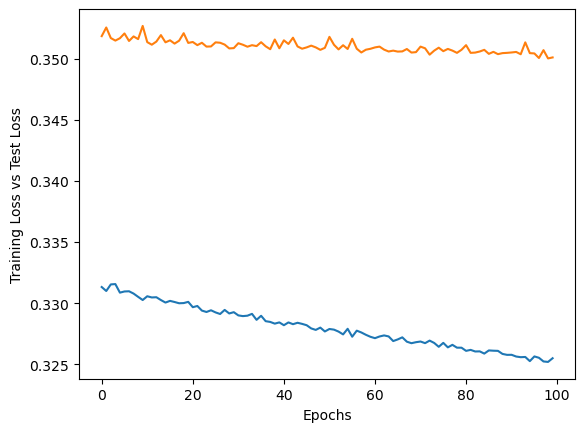

In [ ]:
plt.plot(Training_history.history['loss'])
plt.plot(Training_history.history['val_loss'])
plt.xlabel("Epochs")
plt.ylabel("Training Loss vs Test Loss")

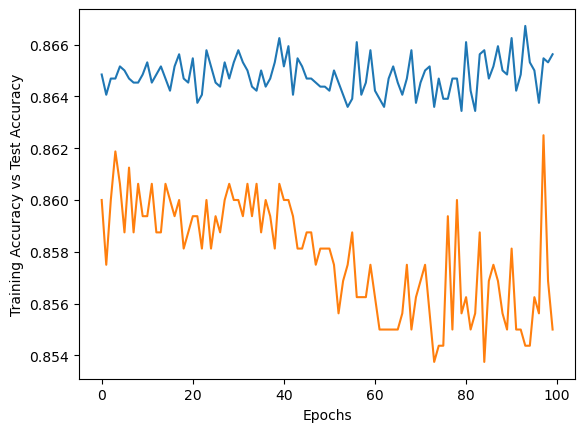

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy vs Test Accuracy")
plt.plot(Training_history.history['accuracy'])
plt.plot(Training_history.history['val_accuracy'])

In [ ]:
By analysing the training loss vs test loss, we can say that training and test data is almost having simillar loss. Hence there is 
no overfitting. Same goes with the accuracy, both data sets are almost giving same accuracy. We can adjust the no of layers and 
hyperparameters in our model to check if we can get more accoracy with less loss.